#### 통계적 추정
- 점추정
  - 모평균이나 모분산 등의 모수를 하나의 수치로 추정
  - 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량을 불편추정량이라고 한다.
  - 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 이 불편성이다.
  - 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해 가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치 추정량이라고 함
  - 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 할 수 있다.
  - 모분산의 불편 추정량이 되는 표본통계량은 불편분산이다.
  - 불편분산은 표본분산에서 나누는 수 n-1로 하는 식으로 계산되며 표본분산은 $S^2$으로 나타내지만 불편분산은 $s^2$으로 나타낸다.
  
- 구간추정
  - 모분산을 알고 있는 경우의 모평균 구간추정
  - 모분산을 알고 있는 경우의 모분산 구간추정
  - 모분산을 알지 못하는 경우의 모평균 구간추정
  - 베르누이 분포의 모평균의 구간추정
  - 포아송 분포의 모평균의 구간추정

In [ ]:
# [과제] 모평균과 모분산의 점추정 사례를 파이썬 코드로 수행하세요.

,score
0,76
1,55
2,80
3,80
4,74


모평균, 모분산: 69.53 206.6691


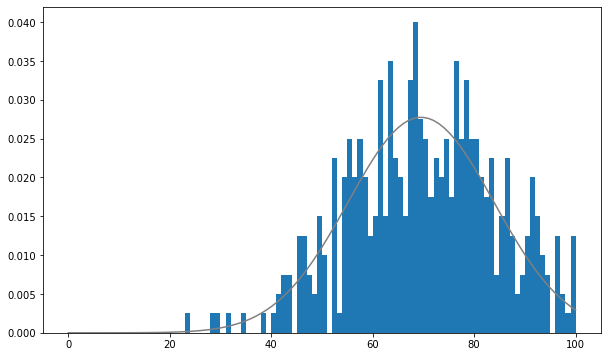

모평균: 69.53 
 표본평균의 기댓값: 69.53799999999998


69.542954

In [7]:
# 시험점수 데이터 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('data/ch4_scores400.csv')
scores = np.array(df['score'])
display(df.head())

# 모평균과 모분산 
p_mean = np.mean(scores)
p_var = np.var(scores)
print('모평균, 모분산:', p_mean, p_var)

# 시험점수 모집단(전교생 시험점수)이 정규분포를 따른다고 가정 
plt.figure(figsize=(10,6))
xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
plt.plot(xs, rv.pdf(xs), color='gray')
plt.hist(scores, bins=100, range=(0,100), density=True) # 전체 시험점수 히스토그램
plt.show()

n = 20
# 표본 크기가 20인 표본 데이터 1만 개 추출
# (표본으로 평균과 분산을 어느 저옫의 정확도로 추출할 수 있는지 시뮬레이션)
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

## 대수의 법칙을 사용하여 기댓값이 모평균인 것을 확인
sample_means = np.mean(samples, axis=1) # 준비해둔 1만 개의 표본 데이터(n=20) 각각의 표본평균을 구하고
s_means = np.mean(sample_means)         # 그 표본평균들의 평균(기댓값) 계산
print('모평균:', p_mean, '\n', 
      '표본평균의 기댓값:', s_means)
## 표본크기 n을 백만까지 키웠을 때의 표본평균
np.mean(np.random.choice(scores, int(1e6)))


In [8]:
## 표본분산이 모분산의 불편추정량이 되는지 대수의 법칙으로 확인
sample_vars = np.var(samples, axis=1) # 준비해둔 1만 개의 표본 데이터 각각의 표본분산 구하고
s_vars = np.mean(sample_vars)         # 표본분산의 평균 
## 불편분산이 모분산의 불편추정량이 되는지 확인
sample_u_vars = np.var(samples, axis=1, ddof=1)
u_vars = np.mean(sample_u_vars)
print('모분산:', p_var, '\n', 
      '표본분산:', s_vars, '\n', 
     '불편분산:', u_vars)


모분산: 206.6691 
 표본분산: 196.34417850000003 
 불편분산: 206.67808263157895


In [ ]:
# [과제] 모분산을 알지 못할 때 정규분포의 모평균의 구간 추정을 파이썬 코드로 수행하세요.

모분산을 모르는 경우
- $\sqrt{\sigma^2/n}$ 대신 불편표준편차의 $\sqrt{s^2/n}$를 표준오차로 사용한다.
- 표준화 과정에서 다음의 식이 사용되는데, 이것은 t분포를 따른다. (카이제곱분포 Y 이용하여 구함)  
$t = $ $Z \over \sqrt{Y/(n-1)}$
- 이 때, $\alpha$ 신뢰구간은 다음과 같다.  
$[\bar{X}-t_{\alpha/2}(n-1)\sqrt{s^2/n}, \bar{X}-t_{1-\alpha/2}(n-1)\sqrt{s^2/n}]$


In [11]:
s_mean = np.mean(sample)
u_var = np.var(sample, ddof=1)

rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)
lcl,ucl

(64.51244886603887, 76.28755113396114)

In [ ]:
# [과제] 모집단에 정규분포를 가정할 수 없는 예를 포아송 분포로 설정하여 95% 수준의 모평균 신뢰구간을 구하세요

In [16]:
# 1시간당 액세스 수
n_access_df = pd.read_csv('data/ch10_access.csv')
print(len(n_access_df),'\n', n_access_df.head(),'\n')
n_access = np.array(n_access_df['access number'])
n = len(n_access)
n_access[:10]

s_mean = n_access.mean()
s_mean

rv = stats.norm
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)
lcl,ucl


72 
    access number
0             10
1             11
2              9
3              9
4             18 



(9.697953549598202, 11.190935339290688)

#### 통계적 가설검정

In [ ]:
# [과제] A학생의 사례로 가설검정의 프로세스를 정리하세요.